In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DL_datafiles/bank-full.csv', delimiter = ';')

In [ ]:
data = data.sample(frac = 1)
data = data.head(10000)

In [ ]:
print(data[data['pdays'] == -1].shape)
print(data[data['pdays'] == -1]['y'].value_counts())

(8194, 17)
no     7447
yes     747
Name: y, dtype: int64


In [ ]:
data['y'].value_counts()

no     8823
yes    1177
Name: y, dtype: int64

In [ ]:
data.shape

(10000, 17)

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12195,37,services,divorced,secondary,no,523,no,no,unknown,20,jun,35,7,-1,0,unknown,no
14559,41,management,married,tertiary,no,4,yes,no,cellular,15,jul,63,2,-1,0,unknown,no
42751,50,blue-collar,married,unknown,no,51,no,no,telephone,27,jan,199,3,-1,0,unknown,no
37815,58,blue-collar,divorced,primary,no,2246,yes,no,cellular,14,may,294,2,-1,0,unknown,no
42725,27,admin.,single,tertiary,no,689,no,no,cellular,26,jan,98,1,307,1,failure,no


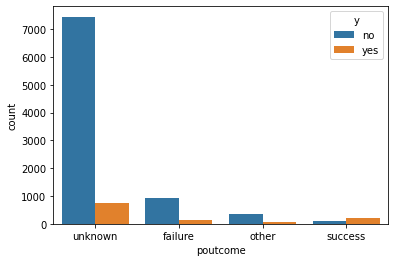

In [ ]:
sns.countplot(x = 'poutcome',hue = 'y',data = data)

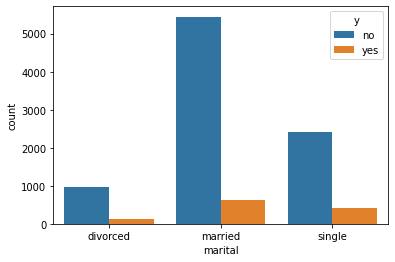

In [ ]:
sns.countplot(x = 'marital',hue = 'y',data = data)

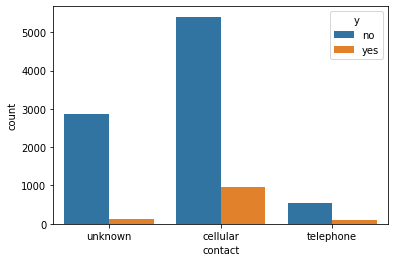

In [ ]:
sns.countplot(x = 'contact',hue = 'y',data = data)

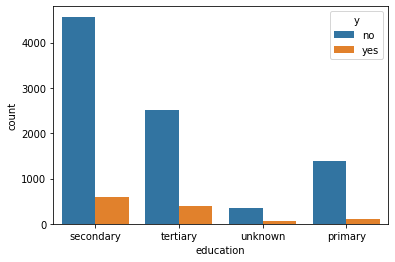

In [ ]:
sns.countplot(x = 'education',hue = 'y',data = data)

In [ ]:
data.job.value_counts()

blue-collar      2216
management       2078
technician       1634
admin.           1133
services          921
retired           511
self-employed     358
entrepreneur      324
unemployed        298
housemaid         268
student           196
unknown            63
Name: job, dtype: int64

In [ ]:
data.education.value_counts()

secondary    5174
tertiary     2914
primary      1513
unknown       399
Name: education, dtype: int64

In [ ]:
# Replace unknowns in Job, Education with mode of respective columns as they are less than 1% in count
data['job'] = np.where(data['job'] == 'unknown','blue-collar',data['job'])
data['education'] = np.where(data['education'] == 'unknown','secondary',data['education'])

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
data.replace({'default': {'no': 0, 'yes': 1},
              'housing': {'no': 0, 'yes': 1},
              'loan': {'no': 0, 'yes': 1},
              'y': {'no': 0, 'yes': 1}}, inplace = True)

In [ ]:
data[data['pdays'] == -1].shape

(8194, 17)

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12195,37,services,divorced,secondary,0,523,0,0,unknown,20,jun,35,7,-1,0,unknown,0
14559,41,management,married,tertiary,0,4,1,0,cellular,15,jul,63,2,-1,0,unknown,0
42751,50,blue-collar,married,secondary,0,51,0,0,telephone,27,jan,199,3,-1,0,unknown,0
37815,58,blue-collar,divorced,primary,0,2246,1,0,cellular,14,may,294,2,-1,0,unknown,0
42725,27,admin.,single,tertiary,0,689,0,0,cellular,26,jan,98,1,307,1,failure,0


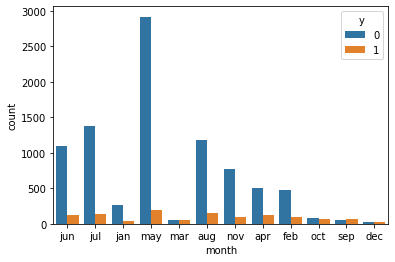

In [ ]:
sns.countplot(x = 'month',hue = 'y',data = data)

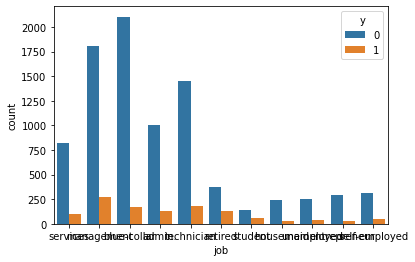

In [ ]:
sns.countplot(x = 'job',hue = 'y',data = data)

In [ ]:
data.drop(['day','pdays'], axis = 1, inplace = True)

In [ ]:
# Group categories to others for Job and Month
data['job'].replace({'self-employed': 'others', 'entrepreneur': 'others', 'unemployed':'others', 'housemaid':'others', 'student':'others'}, inplace = True)
data['month'].replace({'oct': 'others', 'sep': 'others', 'mar':'others', 'dec':'others'}, inplace = True)

In [ ]:
# Create dummy variables:
model_data = pd.get_dummies(data, columns = ['job','marital','education','contact','month','poutcome'])

In [ ]:
model_data.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'previous', 'y', 'job_admin.', 'job_blue-collar', 'job_management',
       'job_others', 'job_retired', 'job_services', 'job_technician',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr',
       'month_aug', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_may', 'month_nov', 'month_others', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [ ]:
model_data.reset_index(drop = True, inplace = True)
model_data.head()

,age,default,balance,housing,loan,duration,campaign,previous,y,job_admin.,...,month_jan,month_jul,month_jun,month_may,month_nov,month_others,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,37,0,523,0,0,35,7,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,41,0,4,1,0,63,2,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,50,0,51,0,0,199,3,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,58,0,2246,1,0,294,2,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,27,0,689,0,0,98,1,1,0,1,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
# Split data into train and test sets:
from sklearn.model_selection import train_test_split
X_rest, X_dev, y_rest, y_dev = train_test_split(model_data.drop(['y'],axis = 1), model_data['y'], test_size=0.10, random_state=42, stratify = model_data['y'])
X_train, X_test, y_train, y_test = train_test_split(X_rest, y_rest, test_size=0.223, random_state=42, stratify = y_rest)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6993, 37)
(6993,)
(2007, 37)
(2007,)


In [ ]:
from sklearn.model_selection import PredefinedSplit
# Create a list where train data indices are -1 and validation data indices are 0
split_index = [-1 if x in X_train.index else 0 for x in X_rest.index]

# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)

In [ ]:
from sklearn import metrics

def evaluate_model(preds, actuals):
    print(f'Accuracy:{metrics.accuracy_score(actuals,preds):0.2f}')
    confusion_matrix = metrics.confusion_matrix(actuals,preds)
    #sns.heatmap(confusion_matrix, annot = True, fmt = 'g')
    print(confusion_matrix)
    precision = confusion_matrix[1,1]/(confusion_matrix[1,1] + confusion_matrix[0,1])
    recall = confusion_matrix[1,1]/(confusion_matrix[1,1] + confusion_matrix[1,0])
    f1score = (2*precision*recall)/(precision + recall)
    print(f'Precision:{precision:0.2f}')
    print(f'Recall:{recall:0.2f}')
    print(f'F1-score:{f1score:0.2f}')

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

def threshold_from_roc(pred,actuals):
  '''
  pred -> predicted probabilities
  '''
  fpr, tpr, thresholds = roc_curve(actuals, pred)
  # get the best threshold
  J = tpr - fpr
  ix = np.argmax(J)
  best_thresh = thresholds[ix]
  return best_thresh

def threshold_from_precision_recall(pred,actuals):
  precision, recall, thresholds = precision_recall_curve(actuals, pred)
  # convert to f score
  fscore = (2 * precision * recall) / (precision + recall)
  # locate the index of the largest f score
  ix = np.argmax(fscore)
  best_thresh = thresholds[ix]
  return best_thresh

Logistic Regression

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

cols_to_scale = ['age','balance','duration','campaign','previous']
X_train_scaled[cols_to_scale] = pd.DataFrame(scaler.fit_transform(X_train_scaled[cols_to_scale]))
X_test_scaled[cols_to_scale] = pd.DataFrame(scaler.transform(X_test_scaled[cols_to_scale]))

In [ ]:
X_train_scaled.columns = X_train.columns
X_test_scaled.columns = X_train.columns

In [ ]:
import statsmodels.api as sm

model = sm.Logit(y_train.values.reshape(-1,1),X_train_scaled).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.238969
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                36168
Model:                          Logit   Df Residuals:                    36136
Method:                           MLE   Df Model:                           31
Date:                Tue, 19 Apr 2022   Pseudo R-squ.:                  0.3378
Time:                        16:03:22   Log-Likelihood:                -8643.0
converged:                       True   LL-Null:                       -13052.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.3460      0.184     -1.879      0.060      -0.707       0.015
default                -0.1007      0.186     -0.542      0.588      -0.465       0.264
balance                 1.6879      0.617      2.737      0.006       0.479       2.896
housing                -0.7036      0.048    -14.528      0.000      -0.799      -0.609
loan                   -0.4522      0.067     -6.773      0.000      -0.583      -0.321
duration               20.5849      0.353     58.276      0.000      19.893      21.277
campaign               -4.9335      0.688     -7.171      0.000      -6.282      -3.585
previous                2.7751      1.863      1.489      0.136      -0.877       6.427
job_admin.             -6.5057   1.85e+06  -3.51e-06      1.000   -3.63e+06    3.63e+06
job_blue-collar        -6.7900   1.87e+06  -3.62e-06      1.000   -3.67e+06    3.67e+06
job_management         -6.6141   1.88e+06  -3.53e-06      1.000   -3.68e+06    3.68e+06
job_others             -6.6765   1.83e+06  -3.65e-06      1.000   -3.59e+06    3.59e+06
job_retired            -6.1072   1.85e+06  -3.29e-06      1.000   -3.63e+06    3.63e+06
job_services           -6.7248   1.84e+06  -3.65e-06      1.000   -3.61e+06    3.61e+06
job_technician         -6.6872   1.89e+06  -3.54e-06      1.000    -3.7e+06     3.7e+06
marital_divorced      -20.8267   1.38e+06  -1.51e-05      1.000   -2.71e+06    2.71e+06
marital_married       -21.0529   1.48e+06  -1.42e-05      1.000    -2.9e+06     2.9e+06
marital_single        -20.7254   1.53e+06  -1.35e-05      1.000      -3e+06       3e+06
education_primary      25.7855   1.61e+05      0.000      1.000   -3.16e+05    3.16e+05
education_secondary    26.0271   3.15e+05   8.27e-05      1.000   -6.17e+05    6.17e+05
education_tertiary     26.1589   1.89e+05      0.000      1.000   -3.71e+05    3.71e+05
contact_cellular       -0.0345   7.11e+05  -4.85e-08      1.000   -1.39e+06    1.39e+06
contact_telephone      -0.1464   7.11e+05  -2.06e-07      1.000   -1.39e+06    1.39e+06
contact_unknown        -1.6280   7.11e+05  -2.29e-06      1.000   -1.39e+06    1.39e+06
month_apr               0.1458   2.66e+06   5.47e-08      1.000   -5.22e+06    5.22e+06
month_aug              -0.6302   2.66e+06  -2.37e-07      1.000   -5.22e+06    5.22e+06
month_feb              -0.1260   2.66e+06  -4.73e-08      1.000   -5.22e+06    5.22e+06
month_jan              -1.0438   2.66e+06  -3.92e-07      1.000   -5.22e+06    5.22e+06
month_jul              -0.7127   2.66e+06  -2.68e-07      1.000   -5.22e+06    5.22e+06
month_jun               0.4997   2.66e+06   1.88e-07      1.000   -5.22e+06    5.22e+06
month_may              -0.3303   2.66e+06  -1.24e-07      1.000   -5.22e+06    5.22e+06
month_nov              -0.7574   2.66e+06  -2.84e-07      1.000   -5.22e+06    5.22e+06
month_others            1.1460   2.66e+06    4.3e-07      1.000   -5.22e+06    5.22e+06
poutcome_failure       -1.1052   1.41e+06  -7.83e-07      1.000   -2.77e+

In [ ]:
print('Train results - ')
preds_train = model.predict(X_train_scaled)
preds_train = np.where(preds_train >= 0.5, 1, 0)
evaluate_model(preds_train, y_train)
print('Test results - ')
preds = model.predict(X_test_scaled)
preds = np.where(preds >= 0.5, 1, 0)
evaluate_model(preds, y_test)

Train results - 
Accuracy:0.90
[[31160   777]
 [ 2782  1449]]
Precision:0.65
Recall:0.34
F1-score:0.45
Test results - 
Accuracy:0.90
[[7787  198]
 [ 692  366]]
Precision:0.65
Recall:0.35
F1-score:0.45


In [ ]:
# Feature selection using p-values
def feature_selection(X_train,y_train,included,pval_threshold):
    while True:
        temp_model = sm.Logit(y_train.values.reshape(-1,1),X_train[included]).fit()
        pvalues = temp_model.pvalues
        # pvalues.drop('const',inplace = True)
        remove_var = pvalues.sort_values(ascending = False).index[0]
        remove_pval = pvalues.sort_values(ascending = False)[0]
        if remove_pval > pval_threshold:
            included.pop(included.index(remove_var))
        else:
            return included

included = list(X_train.columns)
pval_threshold = 0.05
new_features = feature_selection(X_train_scaled,y_train,included,pval_threshold)

Optimization terminated successfully.
         Current function value: 0.238969
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.238969
         Iterations 8


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


Optimization terminated successfully.
         Current function value: 0.238969
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.238969
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.238969
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.238973
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.238998
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.238998
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.239023
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.239056
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.239100
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.239129
  

In [ ]:
final_model = sm.Logit(y_train.values.reshape(-1,1),X_train_scaled[new_features]).fit()
final_model.summary()

Optimization terminated successfully.
         Current function value: 0.239151
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                36168
Model:                          Logit   Df Residuals:                    36143
Method:                           MLE   Df Model:                           24
Date:                Tue, 19 Apr 2022   Pseudo R-squ.:                  0.3373
Time:                        16:14:40   Log-Likelihood:                -8649.6
converged:                       True   LL-Null:                       -13052.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.3640      0.182     -2.005      0.045      -0.720      -0.008
balance                 1.6880      0.616      2.741      0.006       0.481       2.895
housing                -0.6969      0.048    -14.486      0.000      -0.791      -0.603
loan                   -0.4508      0.067     -6.778      0.000      -0.581      -0.320
duration               20.5659      0.353     58.312      0.000      19.875      21.257
campaign               -4.9935      0.687     -7.273      0.000      -6.339      -3.648
job_blue-collar        -0.1497      0.061     -2.437      0.015      -0.270      -0.029
job_retired             0.5227      0.092      5.660      0.000       0.342       0.704
marital_divorced       -2.2343      0.149    -14.965      0.000      -2.527      -1.942
marital_married        -2.4649      0.139    -17.742      0.000      -2.737      -2.193
marital_single         -2.1409      0.130    -16.431      0.000      -2.396      -1.886
education_primary      -0.3952      0.077     -5.159      0.000      -0.545      -0.245
education_secondary    -0.1434      0.046     -3.130      0.002      -0.233      -0.054
contact_unknown        -1.5873      0.080    -19.754      0.000      -1.745      -1.430
month_apr               0.2777      0.094      2.961      0.003       0.094       0.461
month_aug              -0.5017      0.090     -5.605      0.000      -0.677      -0.326
month_jan              -0.9194      0.137     -6.710      0.000      -1.188      -0.651
month_jul              -0.5876      0.091     -6.442      0.000      -0.766      -0.409
month_jun               0.6300      0.104      6.040      0.000       0.426       0.834
month_may              -0.2015      0.089     -2.275      0.023      -0.375      -0.028
month_nov              -0.6335      0.100     -6.358      0.000      -0.829      -0.438
month_others            1.2766      0.093     13.778      0.000       1.095       1.458
poutcome_failure       -0.2956      0.100     -2.970      0.003      -0.491      -0.101
poutcome_success        2.0452      0.108     19.001      0.000       1.834       2.256
poutcome_unknown       -0.3460      0.088     -3.948      0.000      -0.518      -0.174
=======================================================================================
"""

In [ ]:
print('Train results - ')
preds_train = final_model.predict(X_train_scaled[new_features])
preds_train = np.where(preds_train >= 0.5, 1, 0)
evaluate_model(preds_train, y_train)
print('Test results - ')
preds = final_model.predict(X_test_scaled[new_features])
preds = np.where(preds >= 0.5, 1, 0)
evaluate_model(preds, y_test)

Train results - 
Accuracy:0.90
[[31168   769]
 [ 2782  1449]]
Precision:0.65
Recall:0.34
F1-score:0.45
Test results - 
Accuracy:0.90
[[7786  199]
 [ 693  365]]
Precision:0.65
Recall:0.34
F1-score:0.45


In [ ]:
pred_probs = final_model.predict(X_train_scaled[new_features])
roc_thresh = threshold_from_roc(pred_probs,y_train)
pr_thresh = threshold_from_precision_recall(pred_probs,y_train)
print(f'ROC threshold - {roc_thresh}')
print(f'Precision recall threshold - {pr_thresh}')

ROC threshold - 0.10032686116181135
Precision recall threshold - 0.9999999285543555


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


<Figure size 720x720 with 0 Axes>

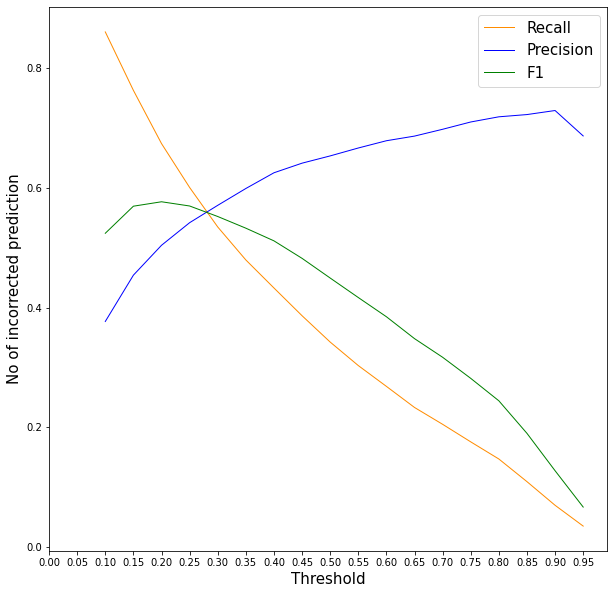

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def set_picture_size(x, y):
    plt.figure()
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = x
    fig_size[1] = y
    
def changing_thr_plot(pred,test):
    '''
    #function to test model performance under different thresholds
    '''
    miss_list=[]
    over_pred_list=[]
    error_list=[]
    f1_list = []

    for thr in np.arange(0.1,1,0.05):
        
        predictions = (pred > thr).astype(int)
        actuals = test.to_list()

        cm = confusion_matrix(actuals, predictions)
        tn, fp, fn, tp = confusion_matrix(actuals, predictions).ravel()
    
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1 = (2*precision*recall)/(precision + recall)

        miss_list.append(recall)
        over_pred_list.append(precision)
        f1_list.append(f1)
        
    threshold=np.arange(0.1,1,0.05)

    set_picture_size(10,10)
    plt.figure()
    plt.plot(threshold, miss_list, color='darkorange', lw=1, label='Recall' )
    plt.plot(threshold, over_pred_list, color='blue', lw=1, label='Precision' )
    plt.plot(threshold, f1_list, color='green', lw=1, label='F1' )
    plt.xticks(np.arange(0,1,0.05))
    plt.xlabel('Threshold', fontsize = 15)
    plt.ylabel('No of incorrected prediction', fontsize = 15)
    plt.legend(loc="upper right",fontsize=15)
    plt.show()
    #plt.savefig('results_with_different_thr.png')
    #plt.close()

preds_train = final_model.predict(X_train_scaled[new_features])
changing_thr_plot(preds_train,y_train)

In [ ]:
print('Train results - ')
pr_thresh = 0.27
preds_train = final_model.predict(X_train_scaled[new_features])
preds_train = np.where(preds_train >= pr_thresh, 1, 0)
evaluate_model(preds_train, y_train)
print('Test results - ')
preds = final_model.predict(X_test_scaled[new_features])
preds = np.where(preds >= pr_thresh, 1, 0)
evaluate_model(preds, y_test)

Train results - 
Accuracy:0.90
[[30001  1936]
 [ 1812  2419]]
Precision:0.56
Recall:0.57
F1-score:0.56
Test results - 
Accuracy:0.90
[[7510  475]
 [ 452  606]]
Precision:0.56
Recall:0.57
F1-score:0.57


Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 123)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=123)

In [ ]:
# As we can see completely overfitted model, we will tune the hyperparameters to reduce overfitting
print('Train results - ')
preds_train = rf.predict(X_train)
evaluate_model(preds_train, y_train)
print('Test results - ')
preds = rf.predict(X_test)
evaluate_model(preds, y_test)

Train results - 
Accuracy:1.00
[[6176    0]
 [   0  824]]
Precision:1.00
Recall:1.00
F1-score:1.00
Test results - 
Accuracy:0.89
[[855  27]
 [ 79  39]]
Precision:0.59
Recall:0.33
F1-score:0.42


In [ ]:
#Randomized CV:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(100,500, num = 5)]
max_features = ['sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10,20,num = 6)] + [None]
min_samples_split = [12,14,16,18]
min_samples_leaf = [8,10,12,15]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split':min_samples_split,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
#print(random_grid)

rf = RandomForestClassifier(random_state = 123)
#rf_cv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=5, random_state=42, n_jobs = -1)#, scoring = 'neg_log_loss')
rf_cv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = pds, verbose=5, random_state=42, n_jobs = -1, refit = False )#, scoring = 'neg_log_loss')
rf_cv.fit(X_rest,y_rest)
print(rf_cv.best_params_)

Fitting 1 folds for each of 50 candidates, totalling 50 fits
{'n_estimators': 100, 'min_samples_split': 16, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 18}


In [ ]:
pd.DataFrame.from_dict(rf_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,3.156370,0.0,0.216488,0.0,400,12,8,log2,12,"{'n_estimators': 400, 'min_samples_split': 12,...",0.901844,0.901844,0.0,17
1,1.482497,0.0,0.108399,0.0,200,12,10,log2,10,"{'n_estimators': 200, 'min_samples_split': 12,...",0.901844,0.901844,0.0,17
2,3.750535,0.0,0.227896,0.0,400,12,8,sqrt,None,"{'n_estimators': 400, 'min_samples_split': 12,...",0.903837,0.903837,0.0,5
3,1.639270,0.0,0.125751,0.0,200,12,10,log2,None,"{'n_estimators': 200, 'min_samples_split': 12,...",0.901345,0.901345,0.0,23
4,2.673235,0.0,0.167942,0.0,300,12,12,sqrt,16,"{'n_estimators': 300, 'min_samples_split': 12,...",0.902342,0.902342,0.0,11
5,1.614172,0.0,0.110351,0.0,200,18,12,log2,20,"{'n_estimators': 200, 'min_samples_split': 18,...",0.901844,0.901844,0.0,17
6,0.925212,0.0,0.059478,0.0,100,12,10,sqrt,18,"{'n_estimators': 100, 'min_samples_split': 12,...",0.901844,0.901844,0.0,17
7,0.801667,0.0,0.057085,0.0,100,14,10,log2,12,"{'n_estimators': 100, 'min_samples_split': 14,...",0.901345,0.901345,0.0,23
8,2.918603,0.0,0.201687,0.0,400,14,12,log2,10,"{'n_estimators': 400, 'min_samples_split': 14,...",0.899851,0.899851,0.0,47
9,1.549759,0.0,0.109823,0.0,200,18,12,log2,12,"{'n_estimators': 200, 'min_samples_split': 18,...",0.900349,0.900349,0.0,37


In [ ]:
rf_model = rf_cv.best_estimator_
print('Train results - ')
preds_train = rf_model.predict(X_train)
evaluate_model(preds_train, y_train)
print('Test results - ')
preds = rf_model.predict(X_test)
evaluate_model(preds, y_test)

Train results - 
Accuracy:0.93
[[31542   395]
 [ 2314  1917]]
Precision:0.83
Recall:0.45
F1-score:0.59
Test results - 
Accuracy:0.90
[[7815  170]
 [ 698  360]]
Precision:0.68
Recall:0.34
F1-score:0.45


In [ ]:
# Find the best threshold using the train set
pred_probs = rf_model.predict_proba(X_train)[:,1]
roc_thresh = threshold_from_roc(pred_probs,y_train)
pr_thresh = threshold_from_precision_recall(pred_probs,y_train)
print(f'ROC threshold - {roc_thresh}')
print(f'Precision recall threshold - {pr_thresh}')

ROC threshold - 0.14578986504100638
Precision recall threshold - 0.3344078112708955


In [ ]:
# ROC threshold
threshold = roc_thresh
print('Train results - ')
preds_train = rf_model.predict_proba(X_train)[:,1]
preds_train = np.where(preds_train >= threshold, 1, 0)
evaluate_model(preds_train, y_train)

print('Test results - ')
preds_test = rf_model.predict_proba(X_test)[:,1]
preds_test = np.where(preds_test >= threshold, 1, 0)
evaluate_model(preds_test, y_test)

Train results - 
Accuracy:0.86
[[27172  4765]
 [  281  3950]]
Precision:0.45
Recall:0.93
F1-score:0.61
Test results - 
Accuracy:0.84
[[6702 1283]
 [ 132  926]]
Precision:0.42
Recall:0.88
F1-score:0.57


In [ ]:
# Precision - recall threshold
threshold = pr_thresh
print('Train results - ')
preds_train = rf_model.predict_proba(X_train)[:,1]
preds_train = np.where(preds_train >= threshold, 1, 0)
evaluate_model(preds_train, y_train)

print('Test results - ')
preds_test = rf_model.predict_proba(X_test)[:,1]
preds_test = np.where(preds_test >= threshold, 1, 0)
evaluate_model(preds_test, y_test)

Train results - 
Accuracy:0.92
[[30197  1740]
 [ 1102  3129]]
Precision:0.64
Recall:0.74
F1-score:0.69
Test results - 
Accuracy:0.90
[[7463  522]
 [ 375  683]]
Precision:0.57
Recall:0.65
F1-score:0.60


In [ ]:
# Feature importances - Random Forest
feature_imp_df = pd.DataFrame({'feature' : X_train.columns,'Importance' : rf_model.feature_importances_})
feature_imp_df.sort_values(by = 'Importance', ascending = False, inplace = True)
'''
# Permutation importance
from sklearn.inspection import permutation_importance
r = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=0)

feature_perm_df = pd.DataFrame({'feature' : X_train.columns,'Importance_mean' : r['importances_mean'], 'Importance_std' : r['importances_std']})
feature_perm_df.sort_values(by = 'Importance_mean', ascending = False, inplace = True)
# feature_perm_df
'''

"\n# Permutation importance\nfrom sklearn.inspection import permutation_importance\nr = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=0)\n\nfeature_perm_df = pd.DataFrame({'feature' : X_train.columns,'Importance_mean' : r['importances_mean'], 'Importance_std' : r['importances_std']})\nfeature_perm_df.sort_values(by = 'Importance_mean', ascending = False, inplace = True)\n# feature_perm_df\n"

In [ ]:
feature_imp_df

,feature,Importance
5,duration,0.413604
35,poutcome_success,0.120542
32,month_others,0.074606
0,age,0.066143
2,balance,0.050904
3,housing,0.032560
7,previous,0.024569
6,campaign,0.018638
36,poutcome_unknown,0.018600
23,contact_unknown,0.018253


In [ ]:
df = feature_imp_df
keep_cols = df[df['Importance'] > 0.005]['feature'].values

In [ ]:
# Keep only selected columns for new model
X_train_new = X_train[keep_cols]
X_test_new = X_test[keep_cols]

rf = RandomForestClassifier(random_state = 123)
rf_cv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1 )#, scoring = 'neg_log_loss')
rf_cv.fit(X_train_new, y_train)
print(rf_cv.best_params_)

rf_model = rf_cv.best_estimator_
threshold = pr_thresh
print('Train results - ')
preds_train = rf_model.predict_proba(X_train_new)[:,1]
preds_train = np.where(preds_train >= threshold, 1, 0)
evaluate_model(preds_train, y_train)

print('Test results - ')
preds_test = rf_model.predict_proba(X_test_new)[:,1]
preds_test = np.where(preds_test >= threshold, 1, 0)
evaluate_model(preds_test, y_test)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'n_estimators': 400, 'min_samples_split': 16, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 20}
Train results - 
Accuracy:0.92
[[30135  1802]
 [ 1054  3177]]
Precision:0.64
Recall:0.75
F1-score:0.69
Test results - 
Accuracy:0.90
[[7453  532]
 [ 362  696]]
Precision:0.57
Recall:0.66
F1-score:0.61


XGBoost

In [ ]:
# Using the ratio of negative samples to positive samples to tackle class imbalance
# len(y_train)-sum(y_train))/sum(y_train)
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 123)
xgb.fit(X_train,y_train)

XGBClassifier(random_state=123)

In [ ]:
# As we can see the model is underfitting the data, we will tune the hyperparameters to fit it better
print('Train results - ')
preds_train = xgb.predict(X_train)
evaluate_model(preds_train, y_train)
print('Test results - ')
preds = xgb.predict(X_test)
evaluate_model(preds, y_test)

Train results - 
Accuracy:0.91
[[31109   828]
 [ 2495  1736]]
Precision:0.68
Recall:0.41
F1-score:0.51
Test results - 
Accuracy:0.90
[[7762  223]
 [ 642  416]]
Precision:0.65
Recall:0.39
F1-score:0.49


In [ ]:
#Randomized CV:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(100,500, num = 5)]
min_child_weight = [1,2,3]
max_depth = [int(x) for x in np.linspace(6,10,num = 5)]
eta = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
gamma = [0,0.1,0.2,0.4]
colsample_bytree = [0.7,0.8,0.9]
#subsample = [0.7,0.8,0.9]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'min_child_weight': min_child_weight,
               'max_depth':max_depth,
               'eta': eta,
               'gamma': gamma,
               'colsample_bytree': colsample_bytree}
               #'subsample': subsample}

#print(random_grid)

xgb = XGBClassifier(random_state = 123)
xgb_cv = RandomizedSearchCV(estimator = xgb, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1 )#, scoring = 'neg_log_loss')
xgb_cv.fit(X_train,y_train)
print(xgb_cv.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 6, 'gamma': 0.1, 'eta': 0.1, 'colsample_bytree': 0.9}


In [ ]:
print('Train results - ')
xgb_model = xgb_cv.best_estimator_
preds_train = xgb_model.predict(X_train)
evaluate_model(preds_train, y_train)
print('Test results - ')
preds = xgb_model.predict(X_test)
evaluate_model(preds, y_test)

Train results - 
Accuracy:0.93
[[31188   749]
 [ 1956  2275]]
Precision:0.75
Recall:0.54
F1-score:0.63
Test results - 
Accuracy:0.91
[[7728  257]
 [ 588  470]]
Precision:0.65
Recall:0.44
F1-score:0.53


In [ ]:
# Find the best threshold using the train set
pred_probs = xgb_model.predict_proba(X_train)[:,1]
roc_thresh = threshold_from_roc(pred_probs,y_train)
pr_thresh = threshold_from_precision_recall(pred_probs,y_train)
print(f'ROC threshold - {roc_thresh}')
print(f'Precision recall threshold - {pr_thresh}')

ROC threshold - 0.12879356741905212
Precision recall threshold - 0.33056679368019104


In [ ]:
# ROC threshold
threshold = roc_thresh
print('Train results - ')
preds_train = xgb_model.predict_proba(X_train)[:,1]
preds_train = np.where(preds_train >= threshold, 1, 0)
evaluate_model(preds_train, y_train)

print('Test results - ')
preds_test = xgb_model.predict_proba(X_test)[:,1]
preds_test = np.where(preds_test >= threshold, 1, 0)
evaluate_model(preds_test, y_test)

Train results - 
Accuracy:0.86
[[27093  4844]
 [  342  3889]]
Precision:0.45
Recall:0.92
F1-score:0.60
Test results - 
Accuracy:0.84
[[6719 1266]
 [ 138  920]]
Precision:0.42
Recall:0.87
F1-score:0.57


In [ ]:
# Precision - recall threshold
threshold = pr_thresh
print('Train results - ')
preds_train = xgb_model.predict_proba(X_train)[:,1]
preds_train = np.where(preds_train >= threshold, 1, 0)
evaluate_model(preds_train, y_train)

print('Test results - ')
preds_test = xgb_model.predict_proba(X_test)[:,1]
preds_test = np.where(preds_test >= threshold, 1, 0)
evaluate_model(preds_test, y_test)

Train results - 
Accuracy:0.92
[[30088  1849]
 [ 1096  3135]]
Precision:0.63
Recall:0.74
F1-score:0.68
Test results - 
Accuracy:0.90
[[7464  521]
 [ 367  691]]
Precision:0.57
Recall:0.65
F1-score:0.61
